In [1]:
from simulator import *

Using device: cuda


In [2]:
f_sol = np.load("saved_arrays/new_fsol_100_05_4.npy")
sis = phsys(100, 0.5, 1.5, 3) #E, z, qF, Medium size (grid)
sis.set_dim(40,40,30,30) #Grid dimensions
sis.set_fsol(f_sol)
sis.set_t(2.005)

In [3]:
print(sis.t)

X_dom = []
for i1 in range(sis.Nu1):
    for i2 in range(sis.Nu2):
        for j1 in range(sis.Nv1):
            for j2 in range(sis.Nv2):
                X_dom.append([sis.U1[i1], sis.U2[i2], sis.V1[j1], sis.V2[j2]])

x_dom_torch = torch.tensor(X_dom, dtype=torch.float32).to(device) #Export domain as a torch tensor

2.005


Epoch 0, Loss: 5656867.0
Epoch 100, Loss: 5528314.0
Epoch 200, Loss: 5410145.0
Epoch 300, Loss: 5304475.5
Epoch 400, Loss: 5190010.0


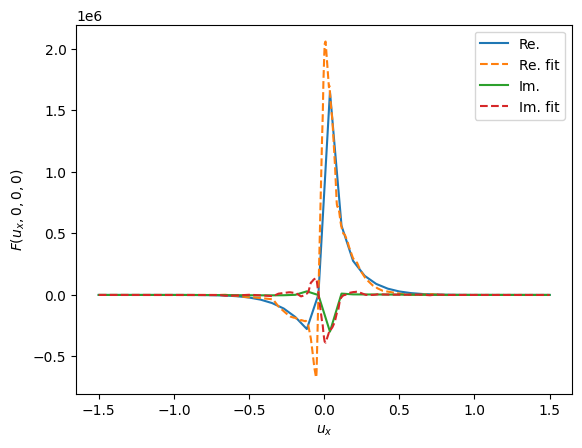

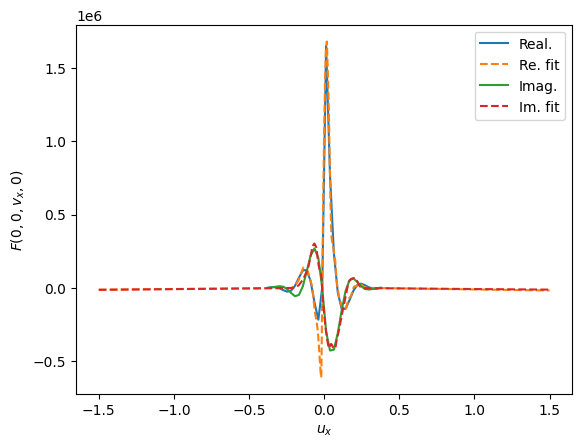

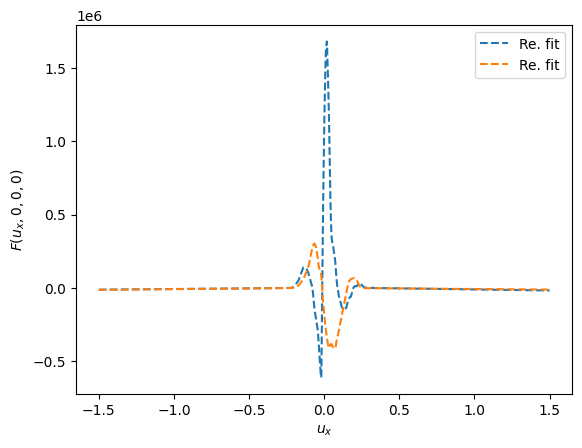

In [10]:
epochs = 500
f_sol_torch_re = torch.tensor(np.real(sis.Fsol[1]).reshape(-1, 1), dtype=torch.float32).to(device)
f_sol_torch_im = torch.tensor(np.imag(sis.Fsol[1]).reshape(-1, 1), dtype=torch.float32).to(device)
f_sol_torch = torch.cat([f_sol_torch_re, f_sol_torch_im], dim = 1)

for epoch in range(epochs):

    optimizer.zero_grad()  

    y_pred = fit(x_dom_torch) 

    loss = criterion(y_pred, f_sol_torch)  

    loss.backward()  # Backpropagation

    optimizer.step()  # Update weights

    if epoch % 100 == 0:  # Print progress every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.item()}')


##PLOT TEST to FIT
U1_new = np.linspace(-sis.L/2, sis.L/2, 2048)
fit_test_re_u1 = .0 * U1_new 
fit_test_im_u1 = .0 * U1_new 

fit_test_re_v1 = .0 * U1_new 
fit_test_im_v1 = .0 * U1_new 

for l in range(len(U1_new)):
    fit_test_re_u1[l] = fit(torch.tensor([U1_new[l], sis.U2[sis.Nu2//2], sis.V1[sis.Nv1//2], sis.V2[sis.Nv2//2]], dtype = torch.float32).to(device)).cpu().detach()[0]

    fit_test_im_u1[l] = fit(torch.tensor([U1_new[l], sis.U2[sis.Nu2//2], sis.V1[sis.Nv1//2], sis.V2[sis.Nv2//2]], dtype = torch.float32).to(device)).cpu().detach()[1]

    fit_test_re_v1[l] = fit(torch.tensor([sis.U1[sis.Nu1//2], sis.U2[sis.Nu2//2], U1_new[l], sis.V2[sis.Nv2//2]], dtype = torch.float32).to(device)).cpu().detach()[0]

    fit_test_im_v1[l] = fit(torch.tensor([sis.U1[sis.Nu1//2], sis.U2[sis.Nu2//2], U1_new[l], sis.V2[sis.Nv2//2]], dtype = torch.float32).to(device)).cpu().detach()[1]



plt.plot(sis.U1, np.real(sis.Fsol[1, :, sis.Nu2//2, sis.Nv1//2, sis.Nv2//2]), label = "Re.")
plt.plot(U1_new, fit_test_re_u1, "--", label = "Re. fit")
plt.plot(sis.U1, np.imag(sis.Fsol[1, :, sis.Nu2//2, sis.Nv1//2, sis.Nv2//2]), label = "Im.")
plt.plot(U1_new, fit_test_im_u1, "--", label = "Im. fit")
plt.xlabel("$u_x$")
plt.ylabel("$F(u_x, 0, 0, 0)$")
plt.legend()
plt.show()

plt.plot(sis.V1, np.real(sis.Fsol[1,  sis.Nu1//2,  sis.Nu2//2, :, sis.Nv2//2 ]), label = "Real.")
plt.plot(U1_new, fit_test_re_v1, "--", label = "Re. fit")
plt.plot(sis.V1, np.imag(sis.Fsol[1, sis.Nu1//2,  sis.Nu2//2, :,  sis.Nv2//2 ]), label = "Imag.")
plt.plot(U1_new, fit_test_im_v1, "--", label = "Im. fit")
plt.xlabel("$u_x$")
plt.ylabel("$F(0, 0, v_x, 0)$")
plt.legend()
plt.show()


plt.plot(U1_new, fit_test_re_v1, "--", label = "Re. fit")
plt.plot(U1_new, fit_test_im_v1, "--", label = "Re. fit")

plt.xlabel("$u_x$")
plt.ylabel("$F(u_x, 0, 0, 0)$")
plt.legend()
plt.show()
#####

#def f_recon(xdom):
#    return (fit_re(xdom) + 1j * fit_im(xdom))




In [7]:
torch.save(fit, "saved_fits/new_fit_3.pth")

/home/marco/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/marco/.local/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


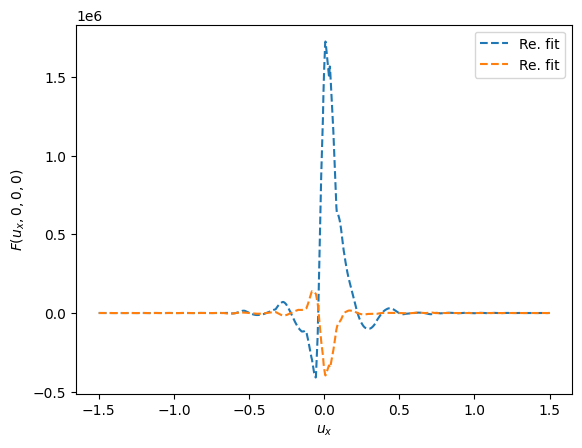

In [6]:
plt.plot(U1_new, fit_test_re_u1 * np.real(np.exp(1j * sis.beta(sis.t) * U1_new**2)), "--", label = "Re. fit")
plt.plot(U1_new, fit_test_im_u1 * np.exp(1j * sis.beta(sis.t) * U1_new**2), "--", label = "Re. fit")

plt.xlabel("$u_x$")
plt.ylabel("$F(u_x, 0, 0, 0)$")
plt.legend()
plt.show()

In [7]:
torch.clear_autocast_cache()